As spatial features, California Housing's 'Latitude' and 'Longitude' make natural candidates for k-means clustering. In this example we'll cluster these with 'MedInc' (median income) to create economic segments in different regions of California.

In [2]:
import kagglehub
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: /Users/unrealre/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1


In [4]:
df = pd.read_csv(os.path.join(path, "housing.csv"))
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X.head()

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [10]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")
X.head(10)

,median_income,latitude,longitude,Cluster
0,8.3252,37.88,-122.23,5
1,8.3014,37.86,-122.22,5
2,7.2574,37.85,-122.24,5
3,5.6431,37.85,-122.25,5
4,3.8462,37.85,-122.25,1
5,4.0368,37.85,-122.25,1
6,3.6591,37.84,-122.25,1
7,3.1200,37.84,-122.25,1
8,2.0804,37.84,-122.26,1
9,3.6912,37.84,-122.25,1


Now let's look at a couple plots to see how effective this was. First, a scatter plot that shows the geographic distribution of the clusters. It seems like the algorithm has created separate segments for higher-income areas on the coasts.

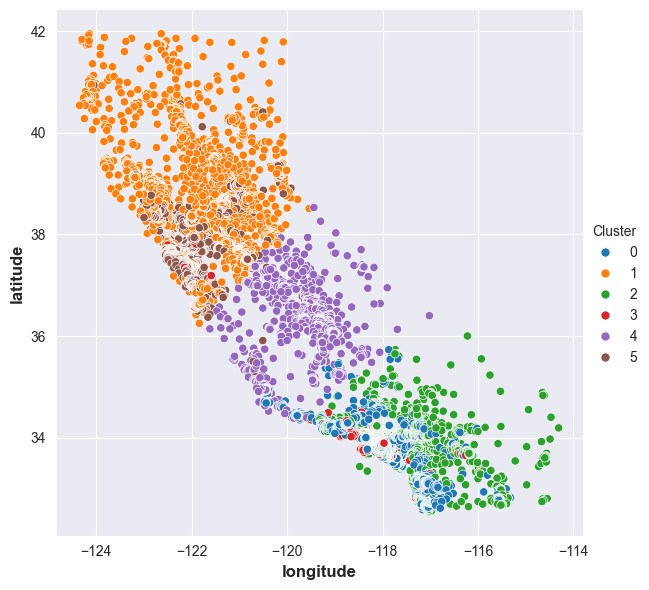

In [12]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
);

The target in this dataset is MedHouseVal (median house value). These box-plots show the distribution of the target within each cluster. If the clustering is informative, these distributions should, for the most part, separate across MedHouseVal, which is indeed what we see.

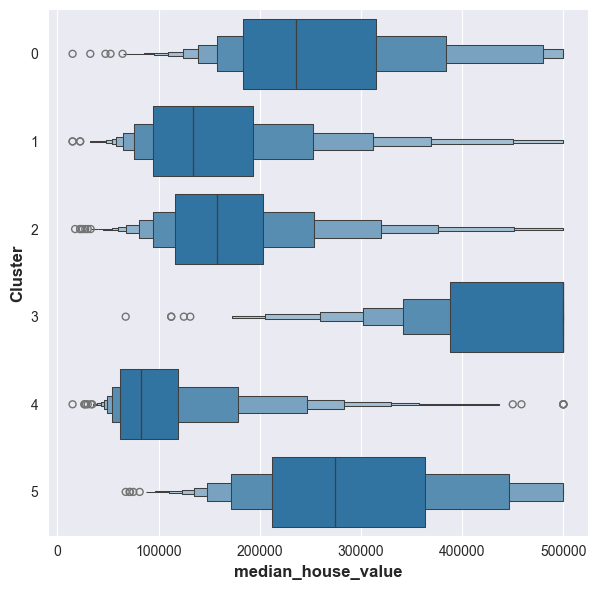

In [15]:
X["median_house_value"] = df["median_house_value"]
sns.catplot(x="median_house_value", y="Cluster", data=X, kind="boxen", height=6);

## Еще примеры k-means

In [7]:
# Создаём простенький датафрейм
data = {
    'x': [1, 2, 1, 8, 9, 8, 25, 24, 26],
    'y': [2, 1, 3, 8, 9, 7, 25, 26, 24]
}
df = pd.DataFrame(data)
df

,x,y
0,1,2
1,2,1
2,1,3
3,8,8
4,9,9
5,8,7
6,25,25
7,24,26
8,26,24


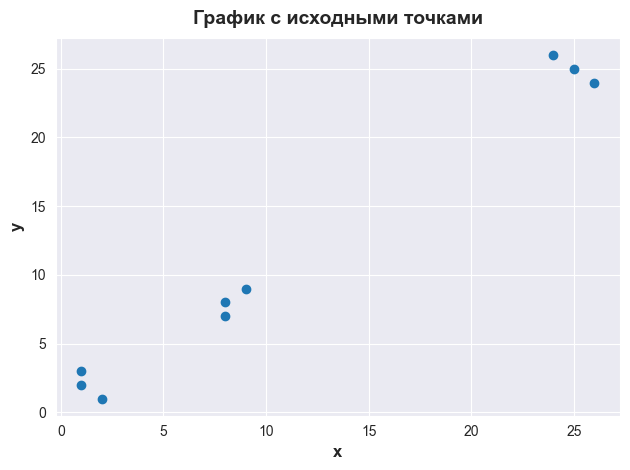

In [10]:
plt.scatter(df.x, df.y,)
plt.title("График с исходными точками")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Применяем KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['x', 'y']])

# Центроиды кластеров
centroids = kmeans.cluster_centers_
centroids

array([[ 8.33333333,  8.        ],
       [25.        , 25.        ],
       [ 1.33333333,  2.        ]])

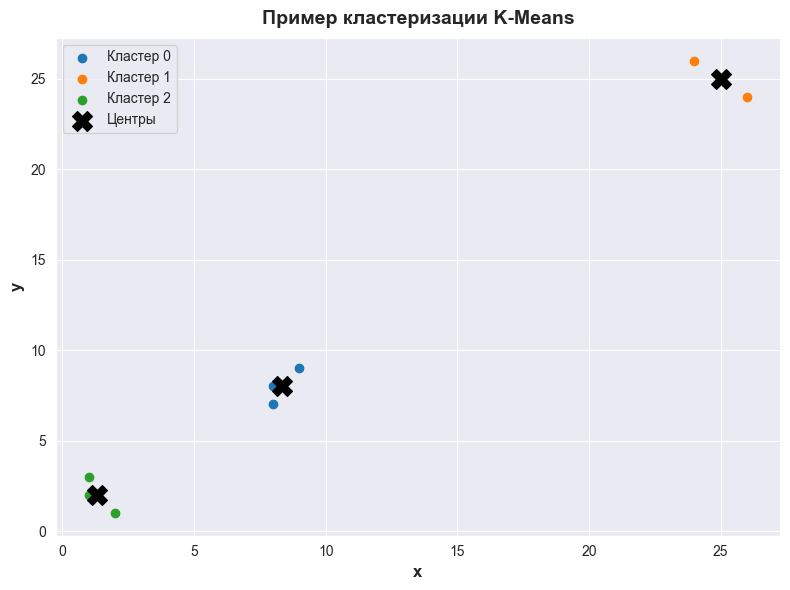

In [17]:

# Строим график для визуализации
plt.figure(figsize=(8, 6))
for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=f'Кластер {cluster_id}')

# Рисуем центры кластеров
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='X', c='black', label='Центры')

plt.title("Пример кластеризации K-Means")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# Кейс, когда мы добавляем не просто кластеры, а фичи с расстоянием до кластеров
from sklearn.preprocessing import StandardScaler

# Масштабируем данные (как в примере)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['x', 'y']])
X_scaled

array([[-1.06133659, -0.98889179],
       [-0.96078891, -1.09119094],
       [-1.06133659, -0.88659264],
       [-0.35750285, -0.37509689],
       [-0.25695517, -0.27279774],
       [-0.35750285, -0.47739604],
       [ 1.35180765,  1.36398868],
       [ 1.25125997,  1.46628783],
       [ 1.45235533,  1.26168953]])

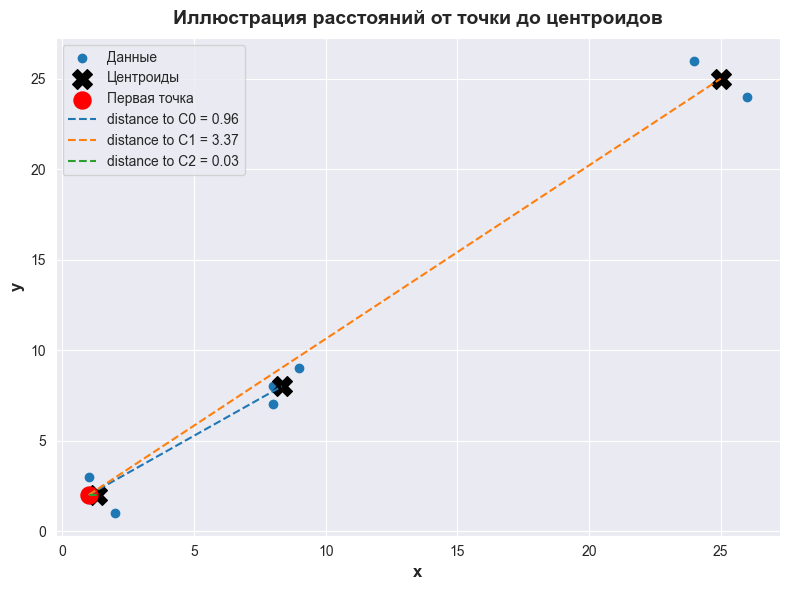

In [21]:
# Применяем KMeans и получаем расстояния до центров
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
X_cd = kmeans.fit_transform(X_scaled)

# Преобразуем расстояния в датафрейм
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
df_with_distances = df.join(X_cd)

# Центры в масштабированных координатах
centroids_scaled = kmeans.cluster_centers_

# Обратно преобразуем центры в оригинальные координаты для визуализации
centroids_original = scaler.inverse_transform(centroids_scaled)

# Визуализация: расстояния от первой точки до всех центров
point = X_scaled[0]  # Первая точка
distances = X_cd.iloc[0].values

plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], label='Данные')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='black', s=200, marker='X', label='Центроиды')
plt.scatter(df.loc[0, 'x'], df.loc[0, 'y'], c='red', s=150, label='Первая точка')

# Рисуем линии от первой точки до всех центров
for i in range(3):
    plt.plot(
        [df.loc[0, 'x'], centroids_original[i, 0]],
        [df.loc[0, 'y'], centroids_original[i, 1]],
        linestyle='--',
        label=f'distance to C{i} = {distances[i]:.2f}'
    )

plt.title("Иллюстрация расстояний от точки до центроидов")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
df_with_distances

,x,y,cluster,Centroid_0,Centroid_1,Centroid_2
0,1,2,2,0.959390,3.370358,0.033516
1,2,1,2,0.958284,3.372834,0.122304
2,1,3,2,0.897392,3.299755,0.107650
3,8,8,0,0.033516,2.438475,0.908884
4,9,9,0,0.122304,2.295035,1.052152
5,8,7,0,0.107650,2.512457,0.843181
6,25,25,1,2.415100,0.000000,3.346443
7,24,26,1,2.423242,0.143440,3.349943
8,26,24,1,2.415463,0.143440,3.349088
